# Projekt Zdjęcie Panoramiczne
przedmiot: Algebra Liniowa

pracownia specjalistyczna 9

członkowie zespołu:
- Jan Hapunik - 120316
- Izabela Rybińska - uzupełnij:3

## 1. wprowadzenie teoretyczne oraz opis wykorzystanego aparatu matematycznego

Zadanie polega na stworzeniu programu będącego w stanie połaczyć przynajmniej dwa zdjęcia wykonane z tego samego miejsca, opisujące różne przestrzenie (ale z istniejącymi punktami wspólnymi) w jedno zdjęcie panoramiczne przy użyciu metod z algebry liniowej. 

### **Aby to osiągnąć potrzebujemy:**

- dwa zdjęcia, z zaznaczonymi punktami wspólnymi, wyznaczonymi ręcznie bądź przez komputer, na początku jednak zrobimy to ręcznie;
- kod umożliwiający przekształcenie zdjęć na osi trzech współrzędnych tak, by zaznaczone punkty się na siebie nakładały. Trzecia współrzędna jest używana jako waga, pozwalająca skalować obraz, więc tak naprawdę poruszamy się po osi dwóch głównych współrzędnych i jednej pomocnej;
- przycięcie końcowego zdjęcia do odpowiednich rozmiarów;

### **Część teoretyczna:**

**Narzędzia matematyczne, z których będziemy korzystać:**|

- **współrzędne jednorodne**

Punkt na obrazie wejściowo opisujemy jako:
$$ p = (x, y, w)^T $$
Niewiadome te reprezentują punkt kartezjański:
$$ (\frac{x}{w}, \frac{y}{w}) $$
Wartość w (na wejściu równa 1) pełni rolę współczynnika skali, dlatego różne trójki jednorodne mogą opisywać ten sam punkt w przestrzeni euklidesowej.
Zastosowanie współrzędnych jednorodnych pozwala zapisać przekształcenia perspektywiczne (homografie) oraz przesunięcia (translacje) w postaci liniowej jako mnożenie przez macierz liniową 3 x 3, co nie byłoby możliwe w klasycznym układzie kartezjańskim.

- **homografia**

Homografia to przekształcenia rzutowe, opisują relację pomiedzy dwoma płaskimi obrazami tej samej sceny widzianej z różnych perspektyw. Za pomocą macierzy homografii jesteśmy w stanie przekształcić punkty z jednego układu współrzędnych (z jednego ze zdjęć) do drugiego.

Macierz homografii H ma wymiar 3 x 3 i wygląda następująco:

$$
H = \begin{bmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{bmatrix}
$$

Relacja pomiędzy punktem źródłowym a punktem docelowym wynosi:

$$ p_{dst} \sim H * p_{src} $$

gdzie $\sim$ oznacza równość z dokładnością do skali.

Parametry macierzy homografii można rozpisać następująco:
$$ (x', y') = \left( \frac{h_{11}x + h_{12}y + h_{13}}{h_{31}x + h_{32}y + 1}, \frac{h_{21}x + h_{22}y + h_{23}}{h_{31}x + h_{32}y + 1} \right) $$

przyjmujemy tutaj $$ h_{33} = 1 $$ aby pozbyć się niejednoznaczności skali.

Końcowo, oznacza to, że aby uzyskać macierz homografii potrzeba minimum 4 par punktów korespondencyjnych.


- **metoda najmniejszych kwadratów**

wip


## 2. wprowadzenie techniczne zawierające opis bibliotek oraz sposób rozwiązania zagadnienia:

In [ ]:
# Wykorzystane biblioteki:

from PIL import Image
# PIL (Pillow) pozwala na otworzenie i przygotowanie zdjęć wejściowych do dalszego przetwarzania, a również na transformację
# istniejących obrazów za pomocą metody .transform().

import matplotlib.pyplot as plt
# Matplotlib pozwala na wyświetlanie obrazów z zaznaczonymi punktami, prezentację wyników po przekształceniach

import numpy as np
# Numpy potrzebne jest do obliczeń macierzy homografii

### proces: 
1. ręczne wyznaczenie par koordynatów
2. obliczenie macierzy homografii
3. normalizacja przestrzeni
4. blending
5. automatyczne przycinanie


## 3. rozwiązania poszczególnych zadań projektowych;

### 1. Samodzielnie wykonać co najmniej dwa różne zdjęcia; wykonane z tego samego miejsca, opisujące różne przestrzenie, których przecięcie jest niepuste.

In [ ]:
# otworzenie zdjęć
img_left = Image.open("./images/1_coordinates.jpg")
img_right = Image.open("./images/2_coordinates.jpg")

In [30]:
# opisanie punktów wspólnych
img_left_coordinates = np.array([(2339, 399), (2992, 606), (2358, 827), (2837, 805),
(3894, 565), (3079, 992), (3907, 1421), (2561, 1540), (3699, 2382), (2997, 2648),
(3681, 2855), (3843, 2867), (2024, 1516), (2041, 936), (3888, 164)])

img_right_coordinates = np.array([(814, 307), (1550, 665), (873, 786), (1380, 834),
(2229, 748), (1526, 1038), (2235, 1470), (965, 1574), (2076, 2304), (1420, 2679),
(2061, 2723), (2188, 2708), (227, 1545), (262, 839), (2228, 411)])

(-0.5, 4095.5, 3071.5, -0.5)

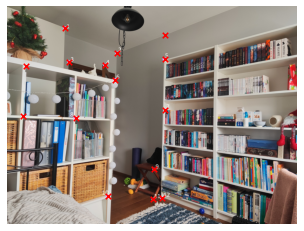

In [39]:
plt.imshow(img_right)
plt.scatter(img_right_coordinates[:,0], img_right_coordinates[:,1],marker="x", color="red", s=30);
plt.axis('off')

(-0.5, 4095.5, 3071.5, -0.5)

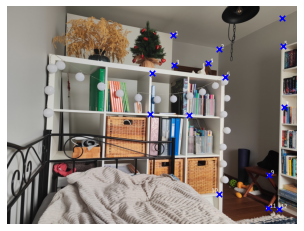

In [40]:
plt.imshow(img_left)
plt.scatter(img_left_coordinates[:,0], img_left_coordinates[:,1],marker="x", color="blue", s=30)
plt.axis('off')


### 2. Z powyższych zdjęć skonstruować jedno zdjęcie panoramiczne korzystając z metod algebry liniowej.
#### (a) Sklasyfikować i sformułować formalnie wszystkie wykonywane przekształcenia oraz metody algebry liniowej.

In [ ]:
# kod z pliku zdjęcie panoramiczne - notatki

def find_coefficients(right_coords, left_coords):
    tmp = []
    for src, tgt in zip(right_coords, left_coords):
        tmp.append([tgt[0],  tgt[1], 1,      0,             0, 0, -src[0]*tgt[0], -src[0]*tgt[1]])
        tmp.append([0,            0, 0, tgt[0],        tgt[1], 1, -src[1]*tgt[0], -src[1]*tgt[1]])
    a = np.matrix(tmp, dtype=float)
    b = np.array(right_coords).reshape(30)
    res = np.dot(np.linalg.inv(a.T * a) * a.T, b)
    return np.array(res).reshape(8)

coefficients to parametry homografii w kierunku: obraz źródłowy → obraz docelowy
$$ (x', y') = \left( \frac{ax + by + c}{gx + hy + 1}, \frac{dx + ey + f}{gx + hy + 1} \right) $$

coefficients są tutaj obliczane metodą najmniejszych kwadratów 
`res = np.dot(np.linalg.inv(a.T * a) * a.T, b)`
(wyjaśnioną w części teoretycznej)


In [42]:
coefficients = find_coefficients(img_left_coordinates, img_right_coordinates)

#### (b) Opisać matematycznie wszystkie rzuty wraz z formalnym przekształceniem.

#### (c) Rozrysować oba zdjęcia w odpowiednim dla nich układzie współrzędnych.

### 3. Czy istnieją metody automatycznej klasyfikacji punktów zbieżnych na obu fotografiach?

### 4. Jaki maksymalnie kąt możemy uchwycić korzystając z odpowiedniego rzutu na płaszczyznę? Dlaczego?

## 4. podsumowanie wyników oraz wnioski;

## 5. notatkę zawierającą informację, które z zadań było najtrudniejsze.